![alt text](Lefilmest-ilunsuccès.png)

# Prédire le succès d'un film

L'objectif de ce projet est de déterminer si un film est susceptible d'être considéré comme un succès en se basant sur certains critères et sur les données disponibles dans notre dataset, qui recense les 1000 meilleurs films selon IMDb.. Le succès d'un film peut être défini de différentes manières, mais dans notre cas, nous le définissons comme un film ayant atteint un certain seuil par rapport aux colonnes 'rating', 'metascore' et 'gross'.

En utilisant des techniques de régression logistique et d'arbre de décision, nous cherchons à construire ce modèle qui peut prédire si le film est un succès ou non.

Avec des critères clés tels que les évaluations du public et des critiques, ainsi que les performances financières des films, le modèle développé dans ce projet peut servir de guide pour l'allocation des ressources dans la production de nouveaux films. Les studios pourront identifier les caractéristiques et les stratégies associées aux succès passés, ce qui leur permettra d'ajuster leurs futurs investissements et de maximiser leurs chances de réussite.

En résumé, ce projet permettra par exemple aux entreprises cinématographiques de tirer des leçons des succès et des échecs passés, et d'utiliser ces connaissances pour orienter leurs décisions d'investissement dans les futurs projets cinématographiques, réduisant ainsi les risques financiers et augmentant les chances de succès sur le marché.

# IMDb 

Abréviation de Internet Movie Database, est une base de données en ligne qui recense des informations sur les films, les émissions de télévision, les séries, les jeux vidéo et les personnalités du monde du divertissement. Créée en 1990, IMDb est devenue une ressource incontournable pour les cinéphiles, les professionnels de l'industrie du divertissement et les médias. Elle propose des informations telles que les synopsis, les castings, les notes des utilisateurs, les critiques de films, les données de production et bien plus encore.

# Qui sera susceptible d'utiliser la solution à notre problème ?


La solution à notre problème pourrait être utilisée par plusieurs parties prenantes dans l'industrie cinématographique et dans d'autres domaines connexes :

- Critiques de cinéma et médias spécialisés
- Distributeurs et exploitants des salles de cinéma
- Studios de cinéma et producteurs
- Investisseurs et financiers

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv('imdb_raw_2.csv')

In [4]:
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97,$4.36M


In [5]:
len(df)

1000

In [6]:
df.describe(include='all')

,title,director,release_year,runtime,genre,rating,metascore,gross
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000
unique,994,560,123,142,195,NaN,NaN,709
top,Beauty and the Beast,Alfred Hitchcock,(2014),130 min,Drama,NaN,NaN,0
freq,2,12,28,24,91,NaN,NaN,188
mean,NaN,NaN,NaN,NaN,NaN,7.96870,66.653000,NaN
std,NaN,NaN,NaN,NaN,NaN,0.27562,30.712829,NaN
min,NaN,NaN,NaN,NaN,NaN,7.60000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.80000,64.750000,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.90000,77.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.10000,86.000000,NaN


# Quelques graphiques réalisés sur Tableau 

![alt text](grossvsfilms.png)

![alt text](genrevstotal.png)

![alt text](réalisateurrevenus.png)

# Remplacement de certaines valeurs et changement de type de colonne

In [7]:
print(df.dtypes)

title            object
director         object
release_year     object
runtime          object
genre            object
rating          float64
metascore         int64
gross            object
dtype: object


In [8]:
df['metascore'] = df['metascore'].astype(float)

df['gross'] = df['gross'].str.replace('$', '')
df['gross'] = df['gross'].str.replace('M', '')
df['gross'] = df['gross'].astype(float)

In [9]:
print(df.dtypes)

title            object
director         object
release_year     object
runtime          object
genre            object
rating          float64
metascore       float64
gross           float64
dtype: object


In [10]:

median_gross1 = df['rating'].median()
df['rating'] = df['rating'].replace(0.00, median_gross1)


median_gross2 = df['metascore'].median()
df['metascore'] = df['metascore'].replace(0.00, median_gross2) 


median_gross3 = df['gross'].median()
df['gross'] = df['gross'].replace(0.00, median_gross3)

In [11]:
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82.0,28.34
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100.0,134.97
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84.0,534.86
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95.0,96.90
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97.0,4.36


# Suppression si présence de doublons 

In [12]:

df_unique = df.drop_duplicates()


print("Nombre de lignes avant la suppression des doublons :", len(df))
print("Nombre de lignes après la suppression des doublons :", len(df_unique))

Nombre de lignes avant la suppression des doublons : 1000
Nombre de lignes après la suppression des doublons : 1000


In [13]:
df= df_unique

# Remplacement des valeurs manquantes 

In [14]:
df.isnull().any() 

title           False
director        False
release_year    False
runtime         False
genre           False
rating          False
metascore       False
gross           False
dtype: bool

# Création de la colonne 'success'

In [15]:
print(df[['rating', 'metascore', 'gross']].describe())

           rating    metascore        gross
count  1000.00000  1000.000000  1000.000000
mean      7.96870    78.665000    59.554100
std       0.27562    11.037237   108.281161
min       7.60000    28.000000     0.010000
25%       7.80000    73.000000     5.095000
50%       7.90000    77.000000     9.420000
75%       8.10000    86.000000    60.167500
max       9.30000   100.000000   936.660000


In [16]:

seuil_rating = 7.96 
seuil_metascore = 78.66  
seuil_gross = 9.42
df['success'] = ((df['rating'] >= seuil_rating) & (df['metascore'] > seuil_metascore) & (df['gross'] > seuil_gross)).astype(int)

La valeur 1 dans la colonne "success" est associée à un film considéré comme un succès, tandis que la valeur 0 est associée à un film non considéré comme un succès.

# Séparation des variables indépendantes et dépendantes

In [17]:
X = df[['rating', 'metascore', 'gross']]
y = df['success']

# Séparation train / test 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

# Normalisation des données numériques sur le train set 

In [19]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_train[:5] 

array([[-0.23475765, -0.33999952,  1.73855445],
       [ 0.50029565,  0.29276795, -0.56989492],
       [ 1.23534896, -1.87672054,  2.48079923],
       [-1.3373376 ,  1.01593078, -0.25843042],
       [ 0.50029565, -0.15920882, -0.47722535]])

# Régression logistique

In [20]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# Modèle d'entrainement

In [21]:
print("Modèle d'entrainement...")
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
print("...Fait.")

Modèle d'entrainement...
...Fait.


# Prédiction sur le train set 

In [22]:
print("Predictions sur le set d'entrainement...")
y_train_pred = classifier.predict(X_train)
print("...Terminer.")
print()

print("#### Les 5 premières prédiction du set d'entrainement ####")
print(y_train_pred[0:5])

Predictions sur le set d'entrainement...
...Terminer.

#### Les 5 premières prédiction du set d'entrainement ####
[0 0 0 0 0]


# Normalisation des données numériques sur le test set 

In [23]:

X_test= std.transform(X_test)


print(X_test[:5])

[[-0.6022843  -1.15355771 -0.11720554]
 [ 0.132769    0.92553543 -0.55509148]
 [ 0.50029565 -0.15920882 -0.47722535]
 [ 0.86782231 -0.15920882 -0.55647313]
 [ 0.132769   -1.87672054 -0.56742768]]


# Prédiction sur le test set 

In [24]:
print("Prédictions sur le set de test ...")
y_test_pred = classifier.predict(X_test)
print("...Terminer.")
print()

print("#### Les 5 premières prédictions sur le set de test sont :  ####")
print(y_train_pred[0:5])

Prédictions sur le set de test ...
...Terminer.

#### Les 5 premières prédictions sur le set de test sont :  ####
[0 0 0 0 0]


# Évaluation de la précision du modèle de régression logistique

In [25]:

accuracy_train = accuracy_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.8975
Accuracy on test set: 0.895


# Matrice de confusion 

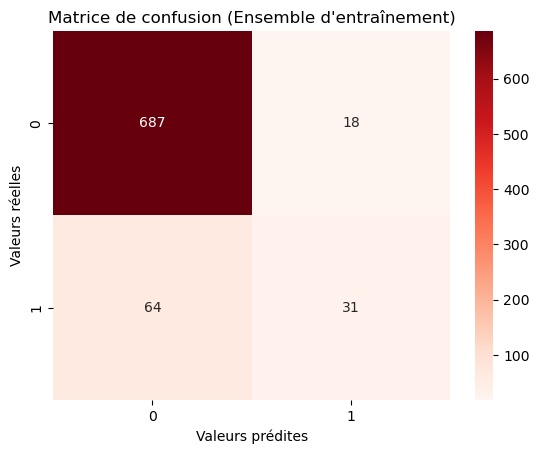

In [26]:
# Prédiction sur l'ensemble d'entraînement
y_train_pred = classifier.predict(X_train)

# Calcul de la matrice de confusion pour l'ensemble d'entraînement
cm = confusion_matrix(y_train, y_train_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')


plt.title('Matrice de confusion (Ensemble d\'entraînement)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')


plt.show()

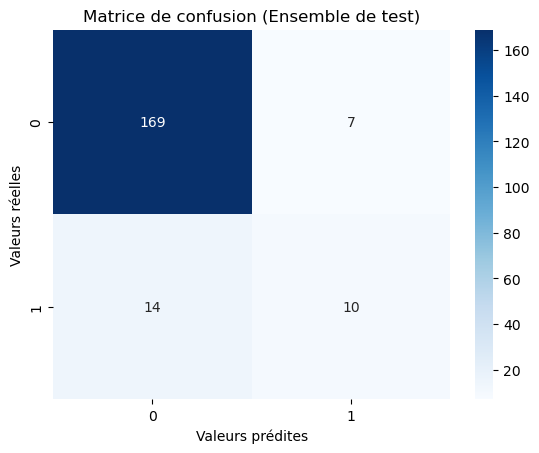

In [27]:

# Prédiction sur l'ensemble de test
y_test_pred = classifier.predict(X_test)

# Calcul de la matrice de confusion pour l'ensemble de test
cm = confusion_matrix(y_test, y_test_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.title('Matrice de confusion (Ensemble de test)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')


plt.show()

In [28]:
# Affichage des coefficients et des transformateurs
print("Coefficients are: ", classifier.coef_) 
print("Intercept is: ", classifier.intercept_)

# Affichage des transformateurs
print("All transformers are: ", std.mean_, std.scale_)


feature_importance = pd.DataFrame({
    "feature_names": ['rating', 'metascore', 'gross'],
    "coefficients": classifier.coef_.squeeze()
})
feature_importance = feature_importance.sort_values(by='coefficients', ascending=False)
print(feature_importance)

Coefficients are:  [[0.96650647 1.4015918  0.585848  ]]
Intercept is:  [-3.04258597]
All transformers are:  [ 7.963875 78.76125  57.756175] [  0.27208911  11.06251547 101.3277585 ]
  feature_names  coefficients
1     metascore      1.401592
0        rating      0.966506
2         gross      0.585848


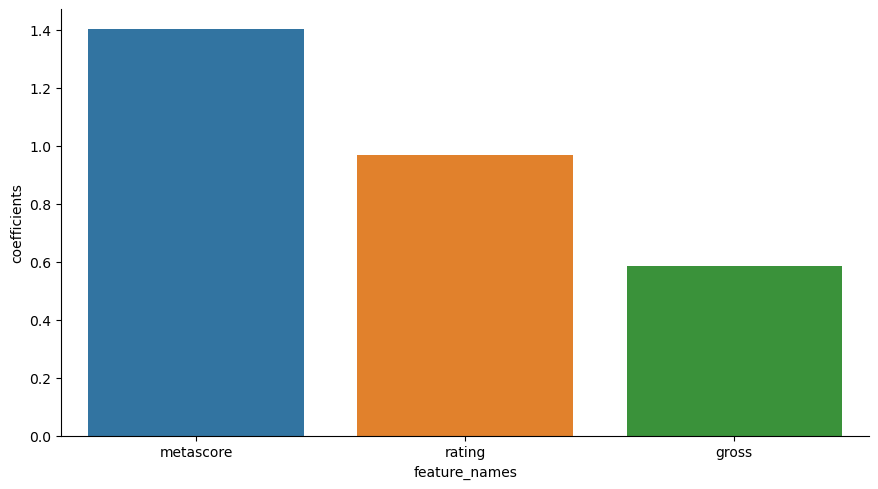

In [29]:
import warnings

# Ignorer les avertissements seaborn
warnings.filterwarnings("ignore", category=UserWarning)

feature_importance["coefficients"] = feature_importance["coefficients"].abs()

sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

# Decision Tree sur le set d'entrainement et de test 

Accuracy on train set: 1.0


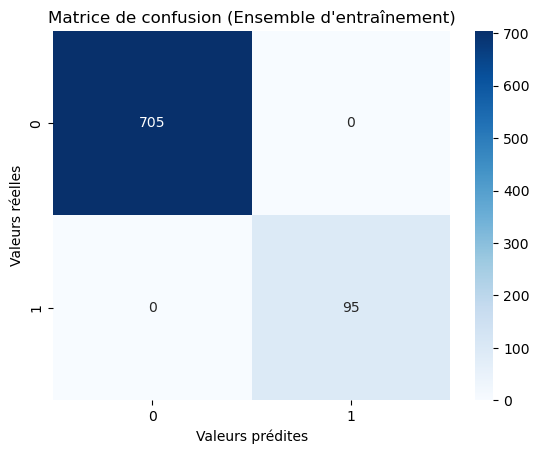

In [30]:

classifier = DecisionTreeClassifier()


classifier.fit(X_train, y_train)


y_train_pred = classifier.predict(X_train)


accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train)


cm_train = confusion_matrix(y_train, y_train_pred)


sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')


plt.title('Matrice de confusion (Ensemble d\'entraînement)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')


plt.show()

Accuracy on test set: 1.0


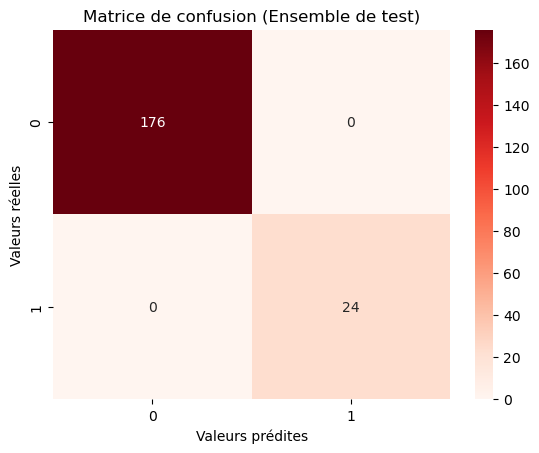

In [31]:

classifier = DecisionTreeClassifier()


classifier.fit(X_train, y_train)


y_test_pred = classifier.predict(X_test)


accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test)


cm_test = confusion_matrix(y_test, y_test_pred)


sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds')


plt.title('Matrice de confusion (Ensemble de test)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')


plt.show()

# Random Forest sur le set d'entrainement et de test 

accuracy-score on train set :  1.0


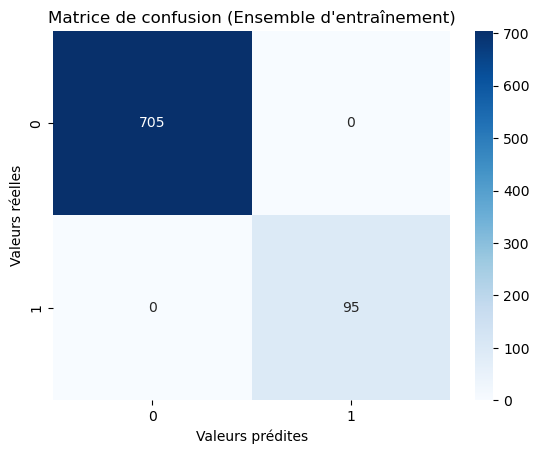

In [32]:

classifier = RandomForestClassifier()


classifier.fit(X_train, y_train)


y_train_pred = classifier.predict(X_train)


cm_train = confusion_matrix(y_train, y_train_pred)

print("accuracy-score on train set : ", classifier.score(X_train, y_train))


sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')


plt.title('Matrice de confusion (Ensemble d\'entraînement)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

plt.show()

Accuracy on test set: 1.0


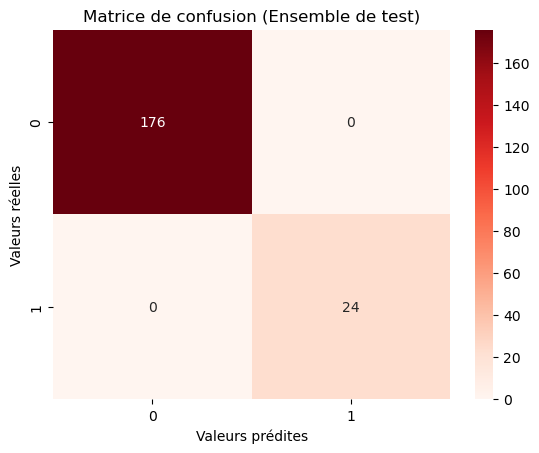

In [33]:

classifier = RandomForestClassifier()


classifier.fit(X_train, y_train)


y_test_pred = classifier.predict(X_test)


accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test)


cm = confusion_matrix(y_test, y_test_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')


plt.title('Matrice de confusion (Ensemble de test)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')


plt.show()

# Prendre un film au hasard et voir s'il s'agit d'un 'succès' ou non 

In [54]:
import random


seuil_rating = 7.96
seuil_metascore = 78.66
seuil_gross = 9.42


print("Seuil de rating :", seuil_rating)
print("Seuil de metascore :", seuil_metascore)
print("Seuil de gross :", seuil_gross)


titre_film_au_hasard = random.choice(df['title'])

# Récupérer les caractéristiques du film sélectionné
caracteristiques_film_au_hasard = df[df['title'] == titre_film_au_hasard]


print("\nTitre du film au hasard :", titre_film_au_hasard)

 
print(caracteristiques_film_au_hasard[['release_year']])


print(caracteristiques_film_au_hasard[['rating', 'metascore', 'gross']])

# Récupérer le succès prédit pour ce film
succes_predit = df[df['title'] == titre_film_au_hasard]['success'].iloc[0]
print("Succès prédit du film :", succes_predit)


Seuil de rating : 7.96
Seuil de metascore : 78.66
Seuil de gross : 9.42

Titre du film au hasard : The Truman Show
    release_year
155       (1998)
     rating  metascore   gross
155     8.2       90.0  125.62
Succès prédit du film : 1


# Quelques graphiques réalisés sur Tableau 

![alt text](réalisateursuccés.png)

![alt text](successvsgenre.png)

# Classement des films succès selon 'rating'

In [35]:
success_films = df[df['success'] == 1]  # Filtrer les films avec succès
success_films_info = success_films[['title', 'rating', 'metascore', 'gross', 'success']]


print(success_films_info.to_string())

print('Nombre de lignes :',success_films_info.shape[0])

                                                 title  rating  metascore   gross  success
0                             The Shawshank Redemption     9.3       82.0   28.34        1
1                                        The Godfather     9.2      100.0  134.97        1
2                                      The Dark Knight     9.0       84.0  534.86        1
3                                     Schindler's List     9.0       95.0   96.90        1
5        The Lord of the Rings: The Return of the King     9.0       94.0  377.85        1
6                                The Godfather Part II     9.0       90.0   57.30        1
8                                         Pulp Fiction     8.9       95.0  107.93        1
10   The Lord of the Rings: The Fellowship of the Ring     8.8       92.0  315.54        1
12                                        Forrest Gump     8.8       82.0  330.25        1
14               The Lord of the Rings: The Two Towers     8.8       87.0  342.55        1

# Classement des films succès selon 'metascore'

In [55]:
success_films_info_sorted = success_films_info.sort_values(by='metascore', ascending=False)
print(success_films_info_sorted.to_string())


                                                 title  rating  metascore   gross  success
112                                 Lawrence of Arabia     8.3      100.0   44.82        1
54                                         Rear Window     8.5      100.0   36.76        1
1                                        The Godfather     9.2      100.0  134.97        1
168                                    Pan's Labyrinth     8.2       98.0   37.63        1
115                                 North by Northwest     8.3       98.0   13.28        1
170                                   Some Like It Hot     8.2       98.0   25.00        1
49                                              Psycho     8.5       97.0   32.00        1
165                                 Gone with the Wind     8.2       97.0  198.68        1
243                                   12 Years a Slave     8.1       96.0   56.67        1
106                                          Toy Story     8.3       96.0  191.80        1

# Classement des films succès selon 'gross'

In [56]:
success_films_info_sorted = success_films_info.sort_values(by='gross', ascending=False)
print(success_films_info_sorted.to_string())


                                                 title  rating  metascore   gross  success
2                                      The Dark Knight     9.0       84.0  534.86        1
45                                       The Lion King     8.5       88.0  422.78        1
113                                        Toy Story 3     8.3       92.0  415.00        1
225       Harry Potter and the Deathly Hallows: Part 2     8.1       85.0  381.01        1
160                                       Finding Nemo     8.2       90.0  380.84        1
5        The Lord of the Rings: The Return of the King     9.0       94.0  377.85        1
227                                         Inside Out     8.1       94.0  356.46        1
14               The Lord of the Rings: The Two Towers     8.8       87.0  342.55        1
12                                        Forrest Gump     8.8       82.0  330.25        1
29                  Star Wars: Episode IV - A New Hope     8.6       90.0  322.74        1

# Recommandations 

- Ajouter plus de films au jeu de données pour mieux évaluer la performance. 
- Approfondir l'analyse des critères utilisés pour déterminer le succès d'un film. Explorez la possibilité d'inclure d'autres variables
